In [41]:
import os
import torch
import scipy.io
import numpy as np
import sys
sys.path.append('/Users/sebastian/University/Bachelor/Thesis/ba-thesis/')
from utils import load_files, get_rdms, get_rdm, get_spearmanr, inter_intra_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
def compare_to_randomized(avg, df):
    d = {}
    for region in list(avg.keys()):
        sorted_ = df[region].sort_values(ascending=False)
        sorted_.drop(labels=avg.keys(), inplace=True)
        d[region] = sorted_
    for region in list(avg.keys()):
        random_indices = np.array([i for i, label in enumerate(d[region].index) if 'Random' in label])
        non_random_indices = np.array([i for i, label in enumerate(d[region].index) if 'Random' not in label])
        random_max = np.max(d[region][random_indices])
        non_random_max = np.max(d[region][non_random_indices])

        diff = non_random_max - random_max
        print(f"{region}: {diff}")
    return d

In [43]:
def plot_spearmanr_comp(sorted_data, name, ax):
    sorted_data = sorted_data[name]
    y = sorted_data.values
    y = 1-y
    x = sorted_data.index.values

    data = {'Category': list(x),
            'Value': list(y)}

    df = pd.DataFrame(data)

    sns.barplot(x='Category', y='Value', data=df, color='white', edgecolor='black', ax=ax)
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel(r'$\bf{deviation\ from\ ' + name + r'\ RDM}$' + '\n' + r'$(1-Spearman \ correlation)$')
    ax.text(0, -0.05, 'best', ha='left', va='center', transform=ax.transAxes)
    ax.text(1, -0.05, 'worst', ha='right', va='center', transform=ax.transAxes)
    for index, row in df.iterrows():
        txt = row['Category']
        if 'Random' in txt:
            ax.text(index, 0.01, row['Category'], ha='center', va='bottom', rotation=90, color='darkblue')
        else:
            ax.text(index, 0.01, row['Category'], ha='center', va='bottom', rotation=90, color='darkgreen')
    ax.set_title(name, fontsize=20, fontweight='bold')

In [44]:
def load_tensors(directory):
    d = {}
    for key in os.listdir(directory):
        if key.endswith(".pt"):
            filename = os.path.join(directory, key)
            tensor = torch.load(filename)
            d[key[:-3]] = tensor
    return d

100%|█████████████████████████████████████████████| 27/27 [00:56<00:00,  2.08s/it]


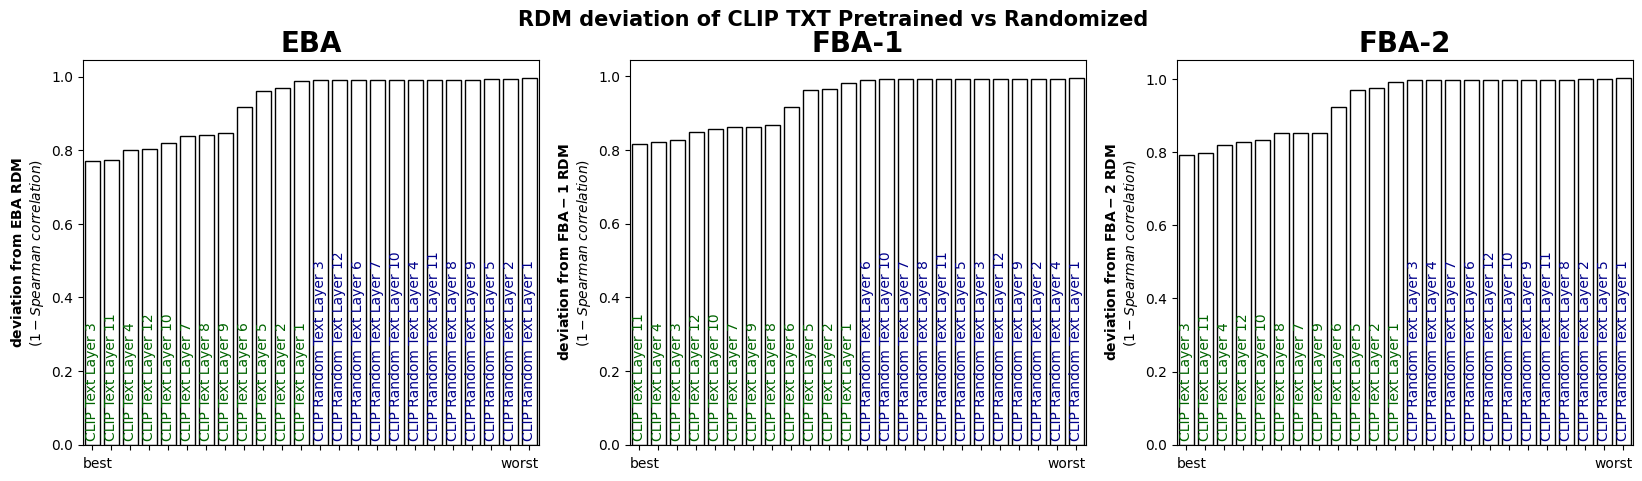

In [34]:
clip_txt_rdms = load_tensors("clip_txt_rdms")
clip_random_txt_rdms = load_tensors("clip_random_txt_rdms")
avg_body = load_tensors("avg_body_lhrh")
clip_txt_data = avg_body | clip_txt_rdms | clip_random_txt_rdms
_, clip_txt_res = get_spearmanr(clip_txt_data, 872)
df_clip_txt = pd.DataFrame(clip_txt_res)
d = compare_to_randomized(avg_body, df_clip_txt)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('RDM deviation of CLIP TXT Pretrained vs Randomized', fontsize=15, fontweight='bold')

plot_spearmanr_comp(d, 'EBA', axs[0])
plot_spearmanr_comp(d, 'FBA-1', axs[1])
plot_spearmanr_comp(d, 'FBA-2', axs[2])

100%|█████████████████████████████████████████████| 27/27 [01:29<00:00,  3.30s/it]


EBA: 0.07184826695524534
FBA-1: 0.06866707850285259
FBA-2: 0.07390485831445805


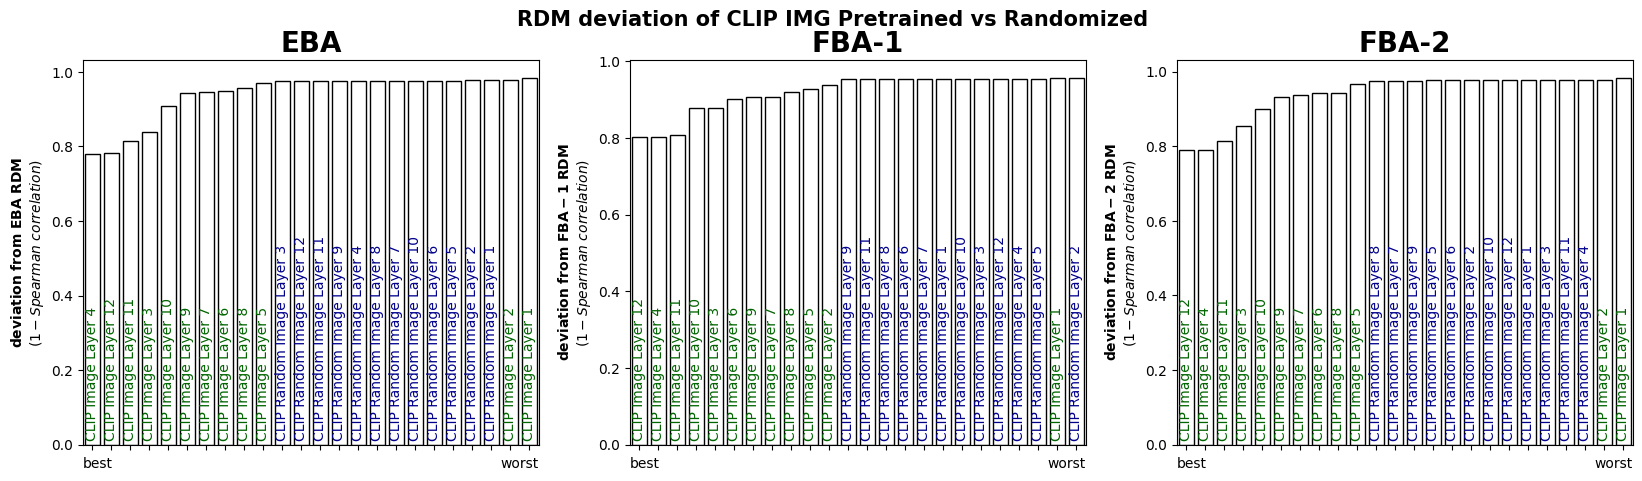

In [64]:
clip_img_rdms = load_tensors("clip_rdms")
clip_random_img_rdms = load_tensors("clip_random_img_rdms")
clip_img_data = avg_body | clip_img_rdms | clip_random_img_rdms
_, clip_img_res = get_spearmanr(clip_img_data, 872)
df_clip_img= pd.DataFrame(clip_img_res)
d_clip_img = compare_to_randomized(avg_body, df_clip_img)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('RDM deviation of CLIP IMG Pretrained vs Randomized', fontsize=15, fontweight='bold')

plot_spearmanr_comp(d_clip_img, 'EBA', axs[0])
plot_spearmanr_comp(d_clip_img, 'FBA-1', axs[1])
plot_spearmanr_comp(d_clip_img, 'FBA-2', axs[2])

100%|█████████████████████████████████████████████| 27/27 [00:57<00:00,  2.11s/it]


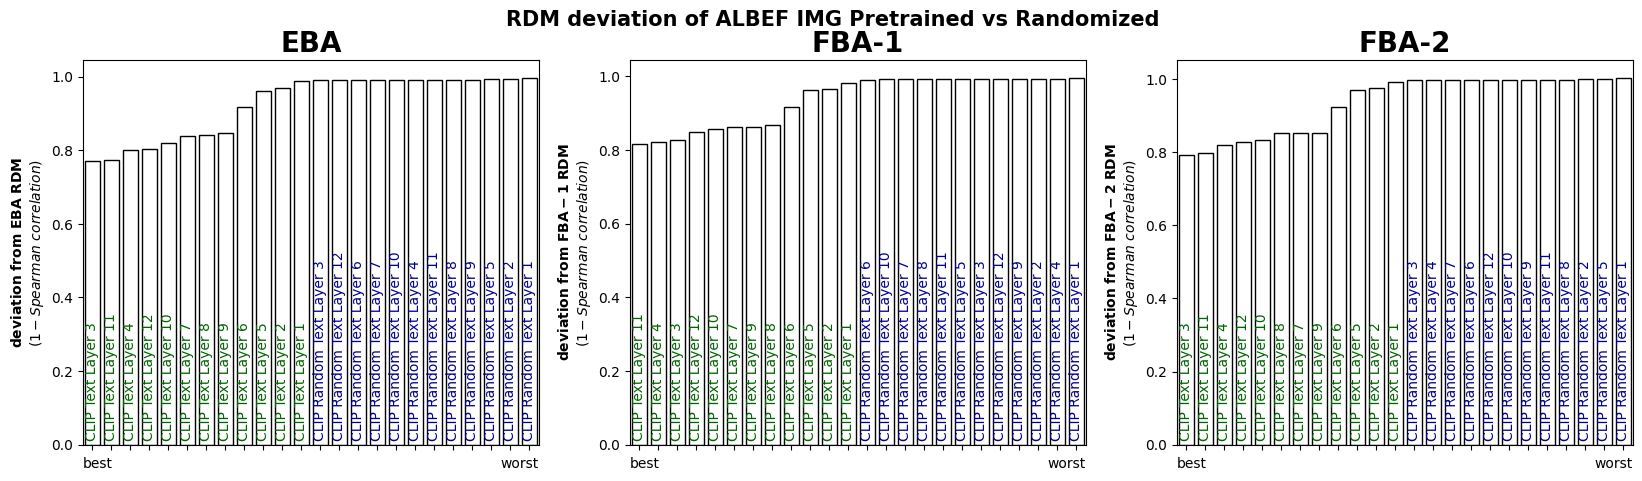

In [36]:
albef_img_rdms = load_tensors("albef_rdms")
albef_random_img_rdms = load_tensors("albef_random_img_rdms")
albef_img_data = avg_body | albef_img_rdms | albef_random_img_rdms
_, albef_img_res = get_spearmanr(albef_img_data, 872)
df_albef_img= pd.DataFrame(albef_img_res)
d_albef_img = compare_to_randomized(avg_body, df_albef_img)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('RDM deviation of ALBEF IMG Pretrained vs Randomized', fontsize=15, fontweight='bold')

plot_spearmanr_comp(d, 'EBA', axs[0])
plot_spearmanr_comp(d, 'FBA-1', axs[1])
plot_spearmanr_comp(d, 'FBA-2', axs[2])

100%|█████████████████████████████████████████████| 15/15 [00:17<00:00,  1.18s/it]


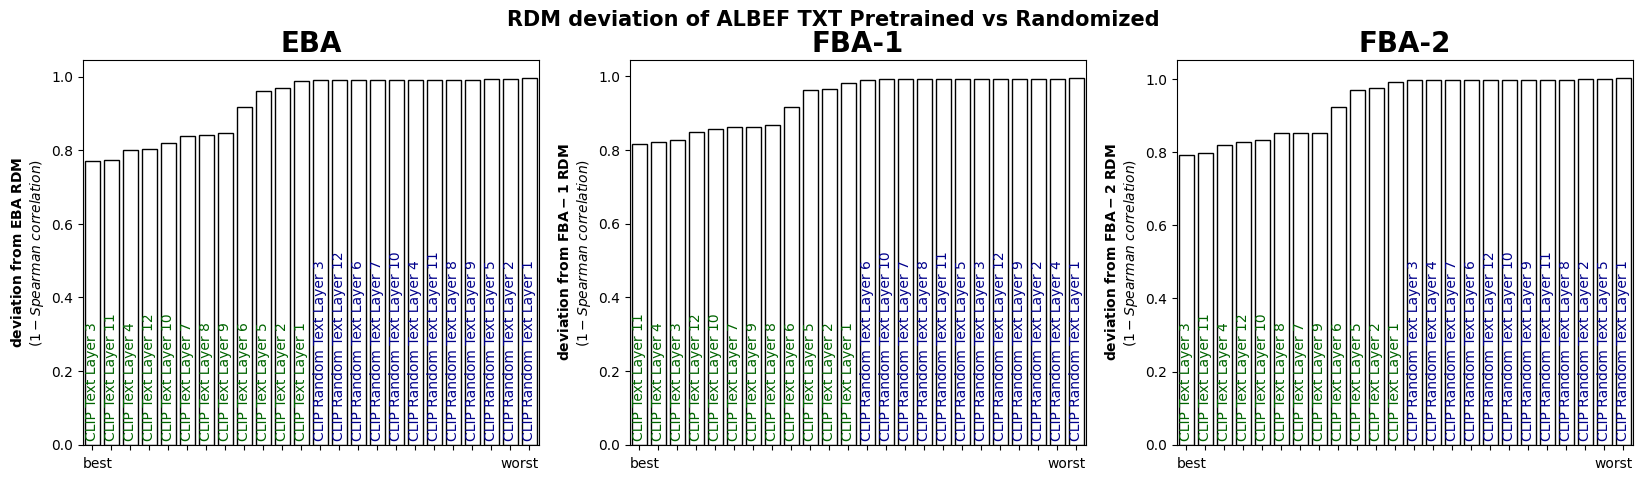

In [37]:
albef_txt_rdms = load_tensors("albef_txt_rdms")
albef_random_txt_rdms = load_tensors("albef_random_txt_rdms")
albef_txt_data = avg_body | albef_txt_rdms | albef_random_txt_rdms
_, albef_txt_res = get_spearmanr(albef_txt_data, 872)
df_albef_txt= pd.DataFrame(albef_txt_res)
d_albef_txt = compare_to_randomized(avg_body, df_albef_txt)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('RDM deviation of ALBEF TXT Pretrained vs Randomized', fontsize=15, fontweight='bold')

plot_spearmanr_comp(d, 'EBA', axs[0])
plot_spearmanr_comp(d, 'FBA-1', axs[1])
plot_spearmanr_comp(d, 'FBA-2', axs[2])

100%|█████████████████████████████████████████████| 15/15 [00:17<00:00,  1.15s/it]


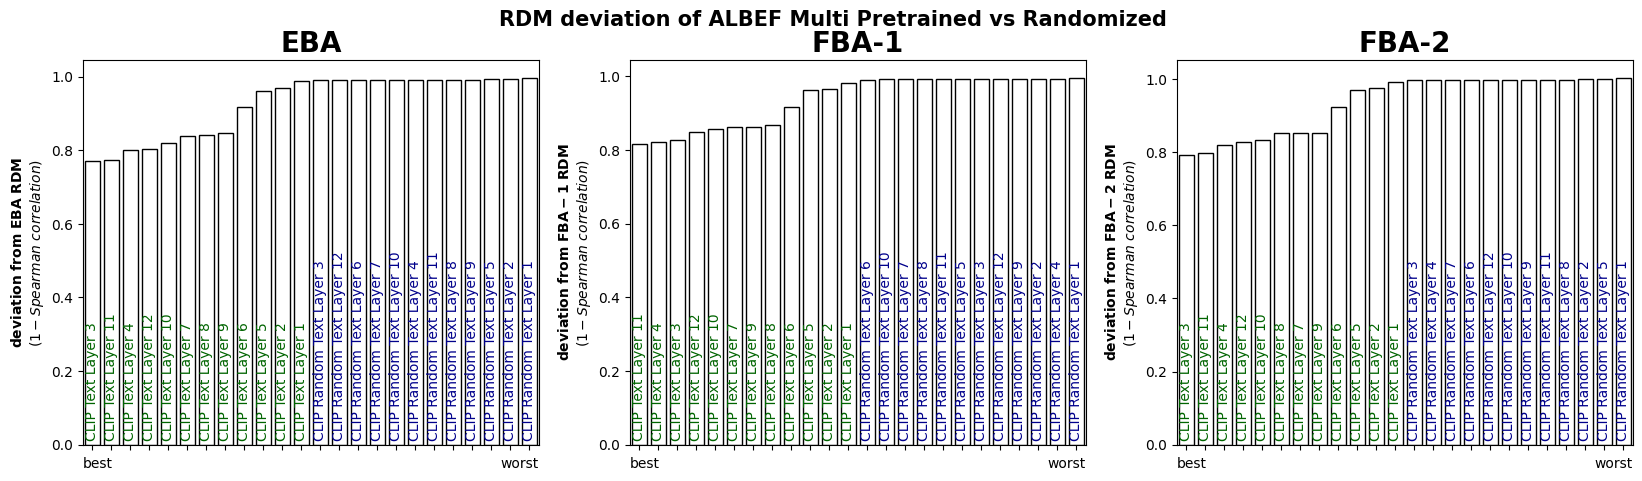

In [38]:
albef_multi_rdms = load_tensors("albef_multi_rdms")
albef_random_multi_rdms = load_tensors("albef_random_multi_rdms")
albef_multi_data = avg_body | albef_multi_rdms | albef_random_multi_rdms
_, albef_multi_res = get_spearmanr(albef_multi_data, 872)
df_albef_multi= pd.DataFrame(albef_multi_res)
d_albef_multi = compare_to_randomized(avg_body, df_albef_multi)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('RDM deviation of ALBEF Multi Pretrained vs Randomized', fontsize=15, fontweight='bold')

plot_spearmanr_comp(d, 'EBA', axs[0])
plot_spearmanr_comp(d, 'FBA-1', axs[1])
plot_spearmanr_comp(d, 'FBA-2', axs[2])

100%|█████████████████████████████████████████████| 27/27 [00:56<00:00,  2.09s/it]


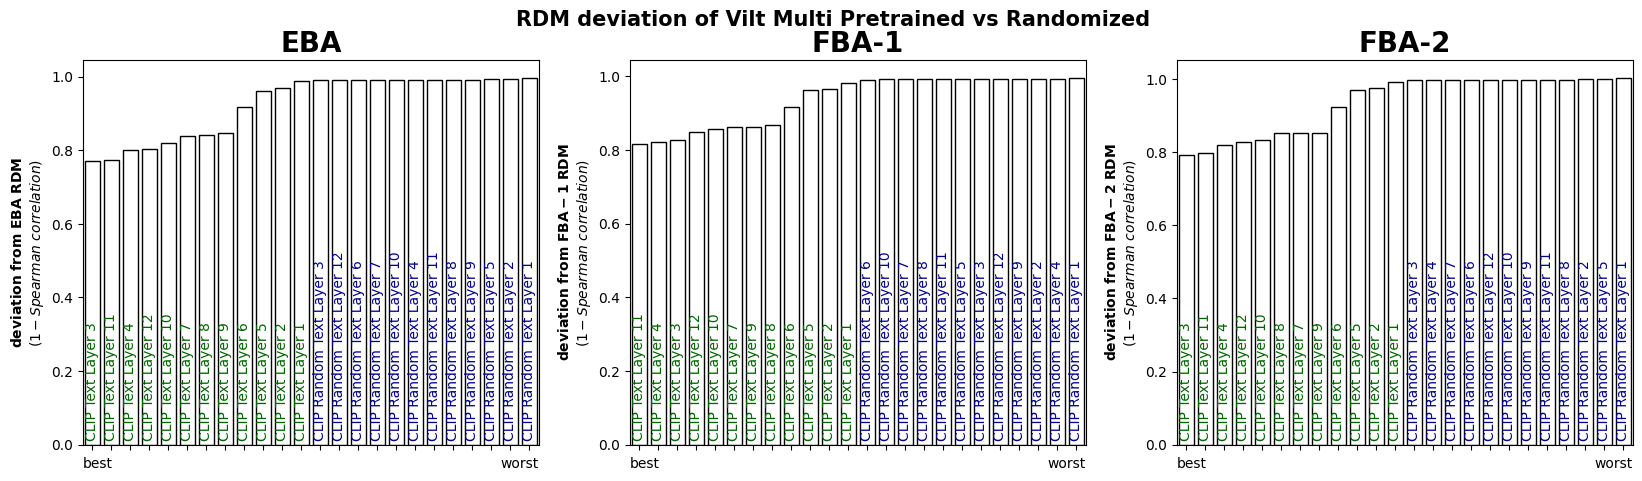

In [39]:
vilt_multi_rdms = load_tensors("vilt_rdms")
vilt_random_multi_rdms = load_tensors("vilt_random_multi_rdms")
vilt_multi_data = avg_body | vilt_multi_rdms | vilt_random_multi_rdms
_, vilt_multi_res = get_spearmanr(vilt_multi_data, 872)
df_vilt_multi= pd.DataFrame(vilt_multi_res)
d_vilt_multi = compare_to_randomized(avg_body, df_vilt_multi)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('RDM deviation of Vilt Multi Pretrained vs Randomized', fontsize=15, fontweight='bold')

plot_spearmanr_comp(d, 'EBA', axs[0])
plot_spearmanr_comp(d, 'FBA-1', axs[1])
plot_spearmanr_comp(d, 'FBA-2', axs[2])

In [40]:
# Table that compares for all, instead of multiple other plots

In [45]:
avg_faces = load_tensors("avg_faces_lhrh")
avg_places = load_tensors("avg_places_lhrh")
avg_streams = load_tensors("avg_streams_lhrh")
avg_body = load_tensors("avg_body_lhrh")
avg_visual = load_tensors("avg_visual_lhrh/")
avg_words = load_tensors("avg_words_lhrh")

In [46]:
clip_txt_rdms = load_tensors("clip_txt_rdms")
clip_random_txt_rdms = load_tensors("clip_random_txt_rdms")
clip_txt_data = avg_body | avg_places |avg_faces |avg_streams |avg_visual |avg_words |clip_txt_rdms | clip_random_txt_rdms
_, clip_txt_res = get_spearmanr(clip_txt_data, 872)
df_clip_txt = pd.DataFrame(clip_txt_res)

100%|█████████████████████████████████████████████| 51/51 [05:21<00:00,  6.31s/it]


In [75]:
clip_img_rdms = load_tensors("clip_rdms")
clip_random_img_rdms = load_tensors("clip_random_img_rdms")
clip_img_data = avg_body | avg_places |avg_faces |avg_streams |avg_visual |avg_words | clip_img_rdms | clip_random_img_rdms
_, clip_img_res = get_spearmanr(clip_img_data, 872)
df_clip_img= pd.DataFrame(clip_img_res)
d_clip_img = compare_to_randomized(avg_body, df_clip_img)

100%|█████████████████████████████████████████████| 51/51 [05:21<00:00,  6.29s/it]

EBA: 0.19030263099868264
FBA-1: 0.2012822364318765
FBA-2: 0.17623903624121073


In [48]:
albef_img_rdms = load_tensors("albef_rdms")
albef_random_img_rdms = load_tensors("albef_random_img_rdms")
albef_img_data = avg_body | avg_places |avg_faces |avg_streams |avg_visual |avg_words | albef_img_rdms | albef_random_img_rdms
_, albef_img_res = get_spearmanr(albef_img_data, 872)
df_albef_img= pd.DataFrame(albef_img_res)
d_albef_img = compare_to_randomized(avg_body, df_albef_img)

100%|█████████████████████████████████████████████| 51/51 [05:18<00:00,  6.25s/it]


In [49]:
albef_txt_rdms = load_tensors("albef_txt_rdms")
albef_random_txt_rdms = load_tensors("albef_random_txt_rdms")
albef_txt_data = avg_body | avg_places |avg_faces |avg_streams |avg_visual |avg_words | albef_txt_rdms | albef_random_txt_rdms
_, albef_txt_res = get_spearmanr(albef_txt_data, 872)
df_albef_txt= pd.DataFrame(albef_txt_res)
d_albef_txt = compare_to_randomized(avg_body, df_albef_txt)

100%|█████████████████████████████████████████████| 39/39 [03:13<00:00,  4.95s/it]


In [ ]:
albef2_txt_rdms = load_tensors("albef_txt_rdms")
albef2_random_txt_rdms = load_tensors("albef_random_txt_rdms")
albef2_txt_data = avg_body | avg_places |avg_faces |avg_streams |avg_visual |avg_words | albef2_txt_rdms | albef_random_txt_rdms
_, albef2_txt_res = get_spearmanr(albef2_txt_data, 872)
df_albef2_txt= pd.DataFrame(albef2_txt_res)

In [50]:
albef_multi_rdms = load_tensors("albef_multi_rdms")
albef_random_multi_rdms = load_tensors("albef_random_multi_rdms")
albef_multi_data = avg_body | avg_places |avg_faces |avg_streams |avg_visual |avg_words | albef_multi_rdms | albef_random_multi_rdms
_, albef_multi_res = get_spearmanr(albef_multi_data, 872)
df_albef_multi= pd.DataFrame(albef_multi_res)
d_albef_multi = compare_to_randomized(avg_body, df_albef_multi)

100%|█████████████████████████████████████████████| 39/39 [03:11<00:00,  4.92s/it]


In [51]:
vilt_multi_rdms = load_tensors("vilt_rdms")
vilt_random_multi_rdms = load_tensors("vilt_random_multi_rdms")
vilt_multi_data = avg_body | avg_places |avg_faces |avg_streams |avg_visual |avg_words | vilt_multi_rdms | vilt_random_multi_rdms
_, vilt_multi_res = get_spearmanr(vilt_multi_data, 872)
df_vilt_multi= pd.DataFrame(vilt_multi_res)
d_vilt_multi = compare_to_randomized(avg, df_vilt_multi)

100%|█████████████████████████████████████████████| 51/51 [05:26<00:00,  6.39s/it]


In [55]:
avg = avg_body | avg_places |avg_faces |avg_streams |avg_visual |avg_words

In [63]:
avg_body.keys(), avg_places.keys(), avg_faces.keys(), avg_streams.keys(), avg_visual.keys(), avg_words.keys()

(dict_keys(['EBA', 'FBA-1', 'FBA-2']),
 dict_keys(['PPA', 'RSC', 'OPA']),
 dict_keys(['OFA', 'FFA-1', 'FFA-2']),
 dict_keys(['early', 'ventral', 'midventral', 'lateral', 'midparietal', 'midlateral', 'parietal']),
 dict_keys(['V3v', 'V2v', 'V1v', 'V2d', 'V3d', 'V1d', 'hV4']),
 dict_keys(['VWFA-1', 'OWFA', 'mfs-words', 'VWFA-2']))

In [101]:
d = compare_to_randomized(avg, df_clip_txt)

EBA: 0.21944533180705036
FBA-1: 0.17423467514506552
FBA-2: 0.20272078067558094
PPA: 0.11100095555855134
RSC: 0.06706748859389668
OPA: 0.10421195902859848
OFA: 0.05039705643922922
FFA-1: 0.17375500090103616
FFA-2: 0.20438616201083454
early: 0.06305099410320535
ventral: 0.17843234647863535
midventral: 0.052665386436235424
lateral: 0.21562235055115084
midparietal: 0.11268990163726791
midlateral: 0.09581123438021562
parietal: 0.09116185314343028
V3v: 0.04776137131955511
V2v: 0.03844890330420469
V1v: 0.03306336263744832
V2d: 0.04307476108235952
V3d: 0.05444898823998043
V1d: 0.033437529573546204
hV4: 0.06285392026862055
VWFA-1: 0.11789139542321105
OWFA: 0.02267435169228045
mfs-words: 0.08326455423208741
VWFA-2: 0.07545110854039122


In [102]:
d = compare_to_randomized(avg, df_clip_img)

EBA: 0.19641036161436598
FBA-1: 0.15008883366545428
FBA-2: 0.18575062460209713
PPA: 0.14557448375100115
RSC: 0.10757394585233088
OPA: 0.12141240505814671
OFA: 0.05322077929501039
FFA-1: 0.16500878819316214
FFA-2: 0.18379824650635687
early: 0.059779610862464735
ventral: 0.1906692181853594
midventral: 0.050974325416841576
lateral: 0.19616450062001353
midparietal: 0.12446342385547712
midlateral: 0.08890489906363447
parietal: 0.10953977557442172
V3v: 0.03359958647235823
V2v: 0.049102270786505434
V1v: 0.04766344110207969
V2d: 0.0496332549013949
V3d: 0.042064067791919325
V1d: 0.03929306323591243
hV4: 0.06097416667746764
VWFA-1: 0.11326075454141012
OWFA: 0.02363126767514834
mfs-words: 0.08574369344613639
VWFA-2: 0.07481329228902223


In [103]:
d = compare_to_randomized(avg, df_albef_img)

EBA: 0.14429594766862713
FBA-1: 0.12951462686363888
FBA-2: 0.13798702790070183
PPA: 0.15603604131355464
RSC: 0.11810289054181852
OPA: 0.12137180997585659
OFA: 0.05059010740812114
FFA-1: 0.13395001972670761
FFA-2: 0.13340910091347713
early: 0.032040947559948796
ventral: 0.18710670881078925
midventral: 0.039829569833173484
lateral: 0.14336273488595933
midparietal: 0.12480389039468437
midlateral: 0.08730610299889677
parietal: 0.11247123952284174
V3v: 0.01857441269912525
V2v: 0.01827866723907845
V1v: 0.016437572025786967
V2d: 0.03372020503213615
V3d: 0.03197237935249712
V1d: 0.02293426422207323
hV4: 0.05158319645653317
VWFA-1: 0.10175948518191047
OWFA: 0.01705838147274596
mfs-words: 0.08154541453284976
VWFA-2: 0.07450582519259824


In [112]:
d_albef_txt = compare_to_randomized(avg, df_albef_txt)

EBA: -0.012938448369463645
FBA-1: -0.030516435076521714
FBA-2: -0.013050878238481764
PPA: -0.018550583280957683
RSC: -0.006767850834567261
OPA: -0.016428696514441666
OFA: -0.0065549690092742245
FFA-1: -0.01732153156349031
FFA-2: -0.012151167544278328
early: -0.008370754029767837
ventral: -0.025722684409231034
midventral: -0.009798037351827691
lateral: -0.009360022593465633
midparietal: -0.01852429888877321
midlateral: -0.015519399130388096
parietal: -0.011170558344491342
V3v: -0.003440176171668496
V2v: -0.0018561899340108342
V1v: -0.0028118956290934544
V2d: -0.004990129679691584
V3d: -0.005664763365738493
V1d: -0.0011948109146810194
hV4: -0.012993192781386838
VWFA-1: -0.020368937384268874
OWFA: -0.00011597142031012555
mfs-words: -0.008393981416274607
VWFA-2: -0.0065655170281036165


In [117]:
d_albef_multi = compare_to_randomized(avg, df_albef_multi)

EBA: 0.030219707015889274
FBA-1: -0.0024385029055083024
FBA-2: 0.02171093802222035
PPA: 0.014310288528874983
RSC: 0.015866386948777896
OPA: 0.006618765470083159
OFA: 0.00022506015374587282
FFA-1: 0.012065459833456312
FFA-2: 0.020917541088960066
early: -0.0491582884002584
ventral: 0.015250809992916253
midventral: -0.010480504343190717
lateral: 0.028313347940930912
midparietal: 0.005090620641233508
midlateral: 0.00229807171068816
parietal: 0.011898781262997558
V3v: -0.019977452409819487
V2v: -0.03790904193202126
V1v: -0.08059275260436742
V2d: -0.016347709565032172
V3d: -0.010658560648325165
V1d: -0.05141693256900179
hV4: -0.012418491162876931
VWFA-1: 0.005897971438983532
OWFA: 0.00010599031326124532
mfs-words: 0.009068618899734333
VWFA-2: 0.0052330822842911046


In [120]:
d = compare_to_randomized(avg, df_vilt_multi)

EBA: 0.20325166983423226
FBA-1: 0.15363534266020426
FBA-2: 0.16625608768211234
PPA: 0.11476592871897728
RSC: 0.06259061673141267
OPA: 0.09951384424596144
OFA: 0.037703768380707964
FFA-1: 0.1504385582918274
FFA-2: 0.16228323332308653
early: -0.007091799686291561
ventral: 0.16420855380713864
midventral: 0.03404784910570782
lateral: 0.19841074167796163
midparietal: 0.10541651415372112
midlateral: 0.07978659287611392
parietal: 0.09170121016607474
V3v: 0.005542881543332004
V2v: -0.019826156528220402
V1v: -0.05992169331403594
V2d: 0.013010173694181573
V3d: 0.026027141919373366
V1d: -0.0298666008664872
hV4: 0.04218646740511582
VWFA-1: 0.09919451130683171
OWFA: 0.012962694978913879
mfs-words: 0.07352452295370729
VWFA-2: 0.05315489212034712


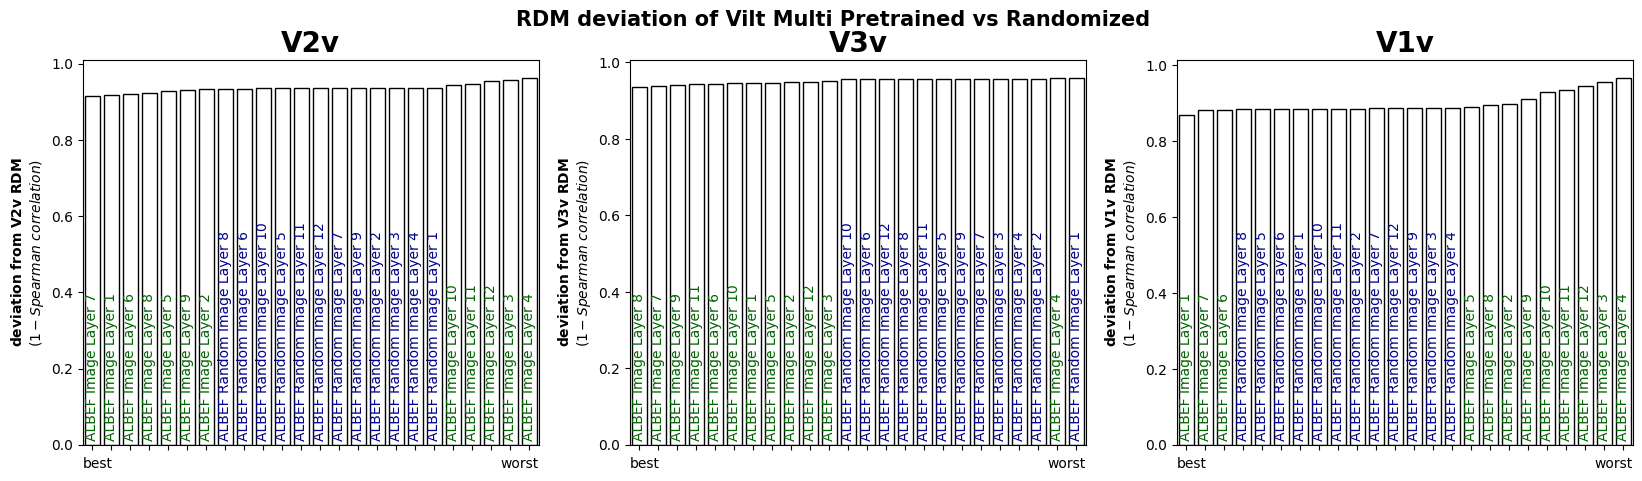

In [71]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('RDM deviation of Vilt Multi Pretrained vs Randomized', fontsize=15, fontweight='bold')

plot_spearmanr_comp(d_albef_img, 'V2v', axs[0])
plot_spearmanr_comp(d_albef_img, 'V3v', axs[1])
plot_spearmanr_comp(d_albef_img, 'V1v', axs[2])

In [95]:
avg_words.keys()

dict_keys(['VWFA-1', 'OWFA', 'mfs-words', 'VWFA-2'])

In [122]:
d['V1v']

VILT Random Layer 4     0.107077
VILT Random Layer 3     0.106827
VILT Random Layer 12    0.106700
VILT Random Layer 11    0.105959
VILT Random Layer 10    0.105665
VILT Random Layer 9     0.104657
VILT Random Layer 8     0.103696
VILT Random Layer 7     0.102997
VILT Random Layer 6     0.102643
VILT Random Layer 5     0.102551
VILT Random Layer 2     0.101661
VILT Random Layer 1     0.100685
VILT Layer 2            0.047156
VILT Layer 5            0.041355
VILT Layer 6            0.038431
VILT Layer 1            0.036956
VILT Layer 10           0.036844
VILT Layer 12           0.036632
VILT Layer 8            0.036589
VILT Layer 7            0.035628
VILT Layer 9            0.034925
VILT Layer 11           0.034539
VILT Layer 3            0.033495
VILT Layer 4            0.022178
Name: V1v, dtype: float64

In [ ]:
V3v: 0.010672674176792352
V2v: -0.000643296583593439
V1v: -0.026898128978668293
V2d: 0.02136900674772111
V3d: 0.02309637077382609
V1d: -0.005662713946049988
hV4: 0.034109025469374527

In [69]:
d_albef_img.keys()

dict_keys(['EBA', 'FBA-1', 'FBA-2'])